![Задача](task.png)

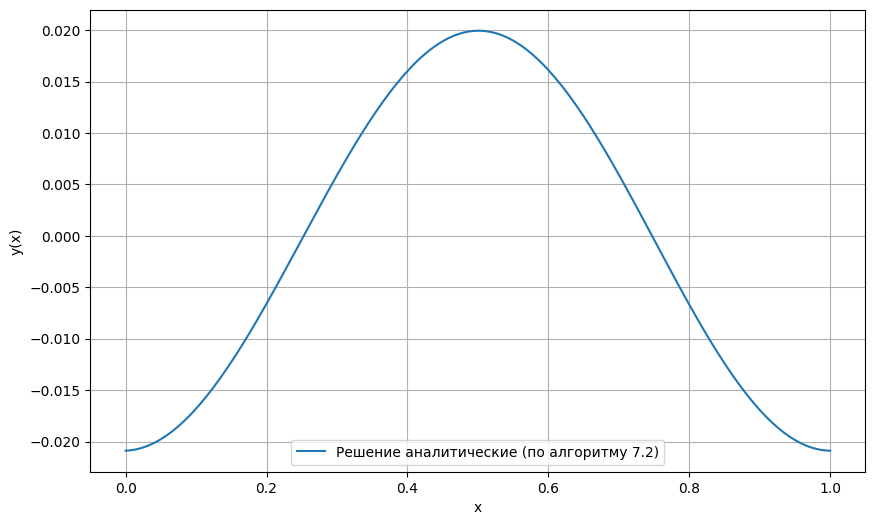

In [41]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.005
N = int(1 / h + 1)
x = np.linspace(0, 1, N)  

def P2(x):
    return 10 + np.sin(2 * np.pi * x)

def f_func(x):
    return np.cos(2 * np.pi * x)

a = np.ones(N)
b = 2 + P2(x) * h**2
c = np.ones(N)
d = f_func(x) * h**2

alpha = np.zeros(N)
beta = np.zeros(N)
gamma = np.zeros(N)

alpha[1] = c[0] / b[0]
beta[1] = -d[0] / b[0]
gamma[1] = a[0] / b[0]

for n in range(1, N - 1):
    denominator = b[n] - a[n] * alpha[n]
    alpha[n + 1] = c[n] / denominator
    beta[n + 1] = (- d[n] + a[n] * beta[n]) / denominator
    gamma[n + 1] = (a[n] * gamma[n]) / denominator

denominator_N = - b[N- 1] + a[N - 1] * (alpha[N - 1] + gamma[N - 1])
mu_N = -c[N - 1] / denominator_N
nu_N = (d[N - 1] - a[N - 1] * beta[N - 1]) / denominator_N
mu = np.zeros(N)
nu = np.zeros(N)
mu[N - 1] = mu_N
nu[N - 1] = nu_N

for n in reversed(range(1, N)):
    mu[n-1] = alpha[n] * mu[n] + gamma[n] * mu_N
    nu[n-1] = beta[n] + alpha[n] * nu[n] + gamma[n] * nu_N

y0 = nu[0] / (1 - mu[0])
y = np.zeros(N)
y[0] = y0
y[N-1] = mu[N-1] * y[0] + nu[N-1]

for n in reversed(range(1, N)):
    y[n-1] = alpha[n] * y[n] + beta[n] + gamma[n] * y[N-1]

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Решение аналитические (по алгоритму 7.2)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.legend()
plt.show()

# true solution

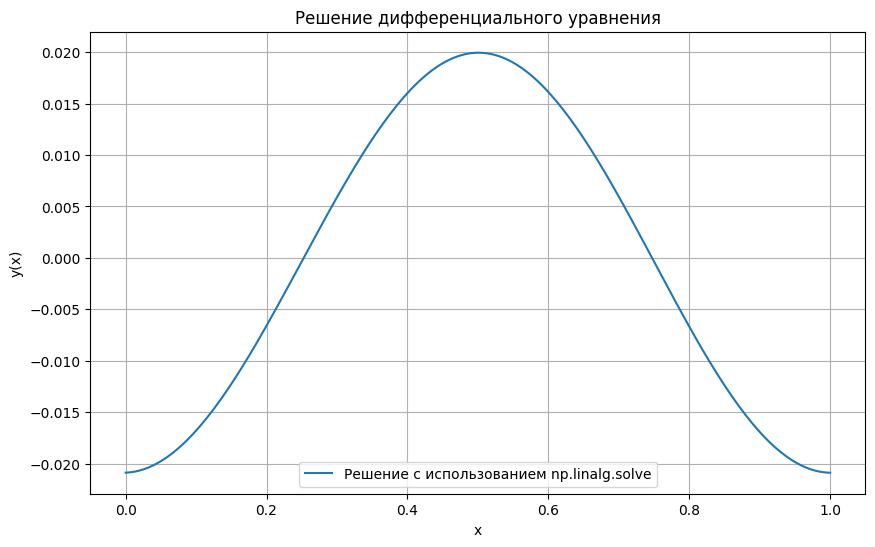

In [ ]:
A = np.zeros((N, N))

for i in range(N):
    A[i, i] = -b[i]
    if i == 0:
        A[i, N - 1] = a[i]  
        A[i, i + 1] = c[i]
    elif i == N - 1:
        A[i, i - 1] = a[i]
        A[i, 0] = c[i]  
    else:
        A[i, i - 1] = a[i]
        A[i, i + 1] = c[i]

y = np.linalg.solve(A, d)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Решение с использованием np.linalg.solve')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Решение дифференциального уравнения')
plt.grid(True)
plt.legend()
plt.show()